In [1]:
####импортируем всякие нужные штучки
import psycopg2 # драйвер для postgresql
import getpass  # прячем параль, чтобы не писать его в параметрах
### создаем соединение
conn=psycopg2.connect(user='postgres',
                      database='postgres',##название базы данных мб другое, как и другие параметры соединения, измените под свои
                      host='localhost',
                      port='5432',
                      password=getpass.getpass('Insert password: ')
                        )
print(conn.get_dsn_parameters())###Проверка, что все норм подключилось

Insert password: ········
{'user': 'postgres', 'dbname': 'postgres', 'host': 'localhost', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'}


In [4]:
###Таблица для отчета Распределение эмитентов по различным платформам
import pandas as pd
query="SELECT \"Platform\", count(distinct \"ISIN\")  FROM listing_task Group by \"Platform\";"
price_in=pd.read_sql_query(query,conn)
price_in

,Platform,count
0,LSE,251
1,ИНТЕРФАКС,1
2,Московская Биржа,2877
3,Московская Биржа - РТС,613
4,НФА,2047
5,ЦБ России,1599


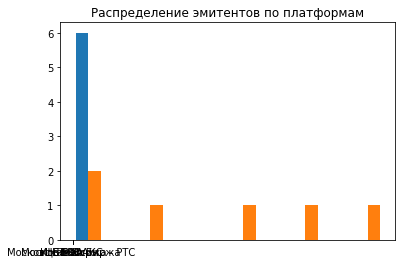

<Figure size 432x288 with 0 Axes>

In [5]:
###График для 4 дз 3 Дз пока не сделано, поэтому строим рандомный график не оч красивый ( почему-то он учитывает первый и второй столбец вместо второго и третьего,
# но для показа как делать отчет подойдет )
import matplotlib as plt
import matplotlib.pyplot as plt
price_in.T
plt.hist(price_in.values)
plt.title('Распределение эмитентов по платформам')
plt.show()
####Сохраняем картинку в рабочую диреткорию
plt.savefig('price_in.png')

In [6]:
# 4 ДЗ
# Импортируем нужные библиотеки и следуем инструкции выложенной на гитхабе
from __future__ import print_function
from jinja2 import Environment, FileSystemLoader
from weasyprint import HTML, Document
import os
####Указываем какие файлы и откуда и с каким описанием экспортируем
env = Environment(loader=FileSystemLoader('.'))
template = env.get_template("myreport.html") # Данный шаблон должен так же находится в рабочей директории
template_vars = {"title": "Отчет составлен Анфиловой Александрой", ###Заголовок отчета
                "INTRO": "Данный отчет содержит график распределения эмитентов по различным платформам", 
                 "TABLE_DESC": "В таблице представлено распредление эмитентов по различным платформам", 
                 "TABLE": price_in.to_html(), ###Указываем какую таблицу брать и в каком формате
                 "IMAGE_DESC": "На графике изображено распрделение эмитентов по различным платформам", 
                 "IMAGE": os.path.realpath('price_in.png') #### Указываем путь до графика ( здесь он сохранен в рабочей директории)
                }

# Собираем и печатаем репорт
html_out = template.render(template_vars, presentational_hints=True)
HTML(string=html_out).write_pdf('Д4_отчет_Анфилова.pdf', presentational_hints=True)
